In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings

# warnings.filterwarnings("ignore")

%matplotlib inline

### Feature Information
1. App: Name of the App
2. Category: Category under which the App falls.
3. Rating: Application's rating on play store.
4. Reviews: Number of reviews of the App.
5. Size: Size of the App.
6. Install: Number of Installs of the App.
7. Type: If the App is free/paid.
8. Price: Price of the app (0 if it is Free).
9. Content Rating: Appropriate Target Audience of the App.
10. Genres: Genre under which the App falls.
11. last_updated_year: The year when the App was last updated.
12. Current Ver: Current Version of the Application.
13. Android Ver: Minimum Android Version required to run the App

In [25]:
df = pd.read_csv('data/google_cleaned.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_updated_day,last_updated_month,last_updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [48]:
df.describe()

,Rating,Reviews,Size,Installs,Price,last_updated_day,last_updated_month,last_updated_year
count,8196.000000,9.659000e+03,8432.000000,9.659000e+03,9659.000000,9659.000000,9659.000000,9659.000000
mean,4.173243,2.165926e+05,18372.195837,7.777507e+06,1.099299,15.632985,6.364013,2017.345688
std,0.536625,1.831320e+06,23292.236057,5.375828e+07,16.852152,9.431017,2.659610,1.137600
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,1.000000,2010.000000
25%,4.000000,2.500000e+01,5.300000,1.000000e+03,0.000000,7.000000,5.000000,2017.000000
50%,4.300000,9.670000e+02,12000.000000,1.000000e+05,0.000000,16.000000,7.000000,2018.000000
75%,4.500000,2.940100e+04,28000.000000,1.000000e+06,0.000000,24.000000,8.000000,2018.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000,31.000000,12.000000,2018.000000


In [26]:
# Found the same application has duplicates
print('Has duplicates' if len(df.duplicated('App').unique()) > 1 else 'No Duplicates')

# Observed 1181 cases of duplicated rows
print("number of duplicates:", df[df.duplicated('App')].shape[0])

# Drop duplicates
df = df.drop_duplicates(subset=['App'], keep='first')

print('Has duplicates' if len(df.duplicated('App').unique()) > 1 else 'No Duplicates')



Has duplicates
number of duplicates: 1181
No Duplicates


In [30]:
## Features map by type 

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: \n{}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: \n{}'.format(len(categorical_features), categorical_features))

We have 8 numerical features: 
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'last_updated_day', 'last_updated_month', 'last_updated_year']
We have 7 categorical features: 
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


<Axes: >

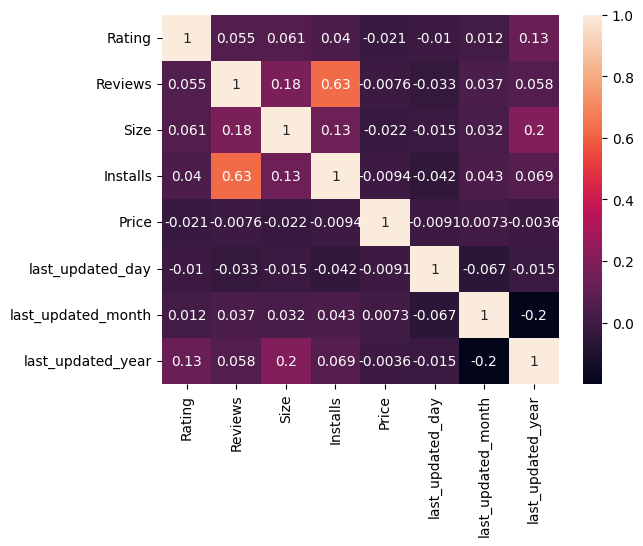

In [41]:
## Check numeric features correlations
numerical_df = df.select_dtypes(include=['number'])
# print(numerical_df.corr())

sns.heatmap(numerical_df.corr(),annot=True)
plt.figure()

The number of reviews shows a moderate positive correlation with the number of installs (𝑟=0.63).
This aligns with the expectation that apps with more installs tend to attract more reviews, as a larger user base increases the likelihood of user engagement.

Other Observed Correlations:
Last Update Year vs. App Size: 
A weak positive correlation is observed (r=0.20), indicating that apps updated more recently tend to have slightly larger file sizes. 
This could reflect the addition of new features or enhanced functionality over time.

Last Update Year vs. App Rating: 
A weak positive correlation is also noted (r=0.13), suggesting that apps updated more frequently tend to have slightly higher ratings.

These findings imply that apps with regular updates may invest more in quality improvements, which could lead to both increased size and better user experiences, as reflected in higher ratings.

Potential Confounding Factor:
The relationship between last update year, app size, and ratings might be influenced by a third variable: investment level. Apps that are actively maintained with frequent updates are likely to receive greater investment in development and user experience, which can lead to higher ratings and larger file sizes.

Future: It may be insightful to explore how the observed correlations vary across different levels of app ratings. For example, stratifying the data into categories such as low-rated apps (rating < 3.0), moderately-rated apps (3.0 ≤ rating < 4.5), and highly-rated apps (rating ≥ 4.5) could reveal nuanced relationships between variables like number of installs, number of reviews, and last update year.

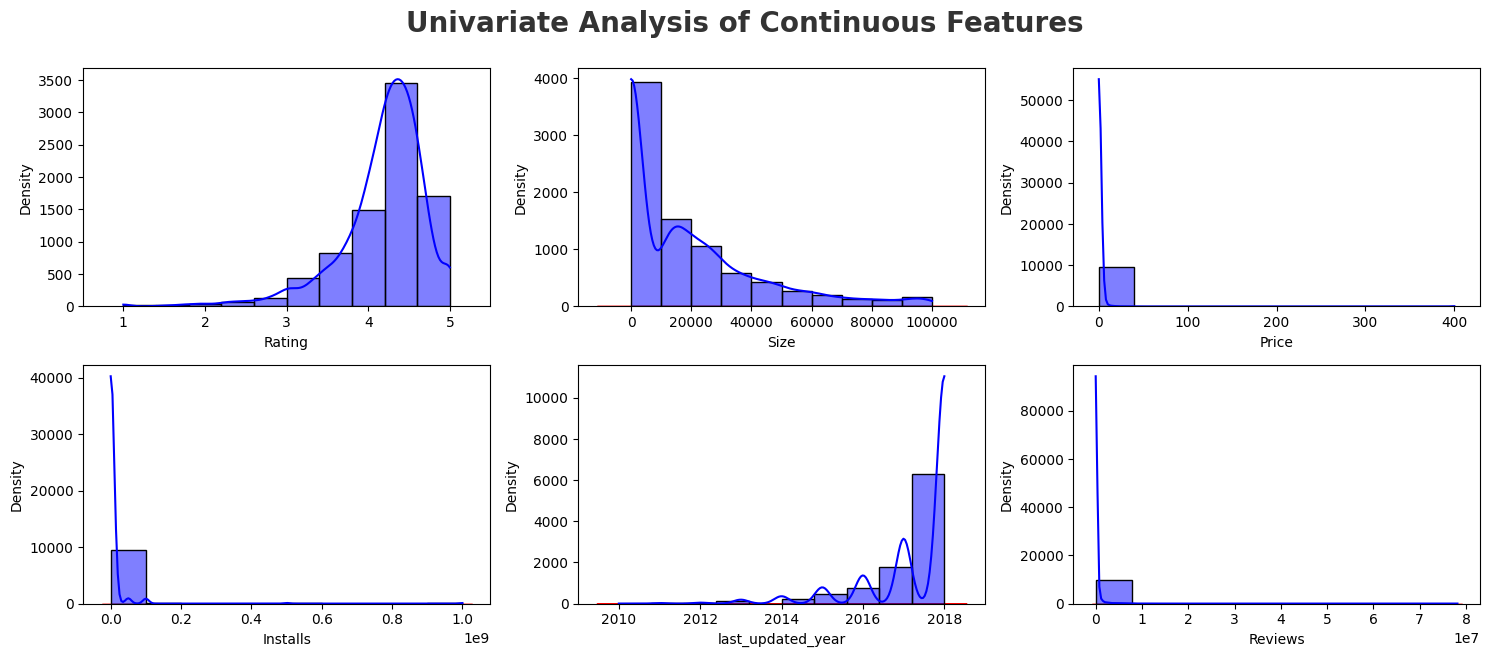

In [52]:
## Proportion of count data on continuous features (or quasi-continuous)

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Continuous Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

columns = ['Rating', 'Size', 'Price', 'Installs', 'last_updated_year', 'Reviews']

for i in range(0, len(columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[columns[i]],fill=True, color='r')
    sns.histplot(df[columns[i]], kde=True, bins=10, color='blue')
    plt.xlabel(columns[i])
    plt.tight_layout()

Ratings: Most apps are rated between 4.0 and 5.0, indicating a strong bias toward high ratings.

Size: App sizes predominantly range from 1kB to 20MB, with outliers likely reflecting larger apps.

Price: Apps are mostly free or cost only a few dollars, consistent with the freemium pricing model.

Installs: The majority of apps are installed only a few times, with fewer apps achieving widespread adoption.

Last Updated Year: A significant portion of apps in the dataset were last updated in 2018, suggesting either dataset collection bias.